<a href="https://colab.research.google.com/github/navidre91/Faulty-Node-Detection/blob/master/Faulty_Node_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sympy import Symbol, Matrix
from sympy import *
from sympy.matrices import *
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import random
from numpy.linalg import matrix_power
from numpy import linalg as LA
from scipy import linalg

Simulating a Healthy network italicized text

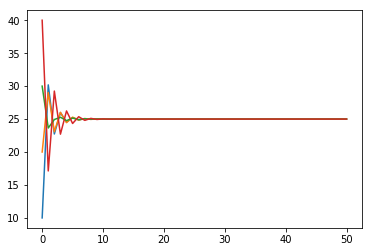

In [ ]:
N=50;
L =np.array([[10.0,10.0,45.0,24.0],[20.0,30.0,40.0,50.0],[40.0,10.0,25.0,60.0],[50.0,50.0,40.0,80.0]])
L= L+L.T
L_DS = L

L_DS[0,:] = L[0,:]/np.sum(L[0,:])
L_DS[:,0] = L_DS[0,:]; 

L_DS[1,1:4] = L[1,1:4]/np.sum(L[1,1:4]) - L_DS[1,0]/3
L_DS[1:4,1] = L_DS[1,1:4]

L_DS[2,2:4] = L[2,2:4]/np.sum(L[2,2:4]) - (L_DS[2,0]+L_DS[2,1])/2
L_DS[2:4,2] = L_DS[2,2:4]

L_DS[3,3]= 1 - (L_DS[3,0]+L_DS[3,1] + L_DS[3,2])


X0 = np.array([[10],[20],[30],[40]])
X=X0
X_rec= X0
for i in range(N):
  X=np.dot(L,X)
  X_rec=np.hstack((X_rec,X))
for i in range(L.shape[1]):
  plt.plot(X_rec[i,:])
  
  
plt.show()

Simulating Network with a faulty node

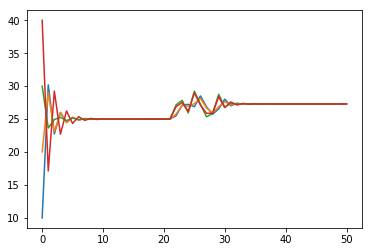

In [ ]:
N=50;
L =np.array([[10.0,10.0,45.0,24.0],[20.0,30.0,40.0,50.0],[40.0,10.0,25.0,60.0],[50.0,50.0,40.0,80.0]])
L= L+L.T
L_DS = L

L_DS[0,:] = L[0,:]/np.sum(L[0,:])
L_DS[:,0] = L_DS[0,:]; 

L_DS[1,1:4] = L[1,1:4]/np.sum(L[1,1:4]) - L_DS[1,0]/3
L_DS[1:4,1] = L_DS[1,1:4]

L_DS[2,2:4] = L[2,2:4]/np.sum(L[2,2:4]) - (L_DS[2,0]+L_DS[2,1])/2
L_DS[2:4,2] = L_DS[2,2:4]

L_DS[3,3]= 1 - (L_DS[3,0]+L_DS[3,1] + L_DS[3,2])


X0 = np.array([[10],[20],[30],[40]])
X=X0
X_rec= X0
for i in range(N):
  Y=X
  
  if 20<i and 30>i:
    Y[0] = Y[0]+ np.random.normal(0, 10, 1)
  X=np.dot(L,Y)
  X_rec=np.hstack((X_rec,X))
  
  
  
for i in range(L.shape[1]):
  plt.plot(X_rec[i,:])
  
  
plt.show()

In [ ]:
print(np.random.normal(0, 1, 1))

[1.18691162]


Making a double stochastic matrix

In [ ]:
dt=0.01;
L=np.array([[2,-1,0,-1],[-1,2,-1,0],[0,-1,2,-1],[-1,0,-1,2]])

Ldis=linalg.expm(-L*dt)
w, v = LA.eig(Ldis)
print(w)
print(v)

[1.         0.98019867 0.96078944 0.98019867]
[[-5.00000000e-01 -7.07106781e-01 -5.00000000e-01 -2.21684296e-03]
 [-5.00000000e-01  1.20422375e-14  5.00000000e-01 -7.07103306e-01]
 [-5.00000000e-01  7.07106781e-01 -5.00000000e-01  2.21684296e-03]
 [-5.00000000e-01 -4.85830600e-15  5.00000000e-01  7.07103306e-01]]


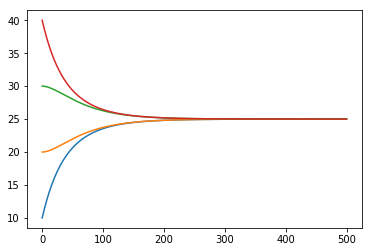

In [ ]:
N=500;

X0 = np.array([[10],[20],[30],[40]])
X=X0
X_rec= X0
for i in range(N):
  
  X=np.dot(Ldis,X)
  X_rec=np.hstack((X_rec,X))
  
  
  
for i in range(L.shape[1]):
  plt.plot(X_rec[i,:])
  
  
plt.show()
 

Test Samples

In [ ]:
A=np.array([[1],[2]])
print(A.shape[0])

2
